In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid

In [ ]:
DirPath = '/Users/oozdal/Documents/hdenergy/datascience_test'
df = pd.read_csv(DirPath + '/' + 'data.csv', header=0, sep=",")

train = pd.read_csv(DirPath + '/' + 'train_data.csv', header=0, sep=",")
test = pd.read_csv(DirPath + '/' + 'test_data.csv', header=0, sep=",")

In [6]:
df.head()

,date,energy,enthalpy
0,2019-02-22,6938.614286,-5851.336089
1,2019-02-23,7148.391429,-6441.032345
2,2019-02-24,7110.120000,-4349.099258
3,2019-02-25,7072.765714,-2372.592647
4,2019-02-26,7222.465714,-2360.898917


In [7]:
train.head()

,date,energy,enthalpy
0,2019-06-02,6661.954286,30488.616385
1,2019-06-03,6663.454286,30338.174100
2,2019-06-04,6653.537143,30670.887292
3,2019-06-05,6643.868571,30807.607844
4,2019-06-06,6616.860000,30775.883551


In [8]:
test.head()

,date,energy,enthalpy
0,2019-02-22,6938.614286,-5851.336089
1,2019-02-23,7148.391429,-6441.032345
2,2019-02-24,7110.120000,-4349.099258
3,2019-02-25,7072.765714,-2372.592647
4,2019-02-26,7222.465714,-2360.898917


# Question 1

Describe (with pseudocode or real code) how to find an element by value in an unsorted list (i.e. define the "find" function for a list, with a list and a value as inputs). The function should return the index of the element found. What should you return if the element is not in the list?
For simplicity, you can assume a list of integers.

In [9]:
unsorted_list = df.energy.to_list()
type(unsorted_list)

list

In [10]:
def find_unsorted(unsorted_list, value):
    try:
        Index = unsorted_list.index(value)
        return print("Index: ", Index)
    except ValueError:
        return print(str(value) + " is not an element of the list") 

In [11]:
find_unsorted(unsorted_list, 7072.765714285713)

Index:  3


In [12]:
find_unsorted(unsorted_list, 1234)

1234 is not an element of the list


# Question 2 (First Approach)

How would optimise the "find" function of Q1 if the input list is a sorted list?

In [13]:
def find_sorted(sorted_list, value):
    if value in sorted_list:
    
        temp = [(v,i) for i,v in enumerate(sorted_list)]
        temp.sort()

        for i in temp:
            if i[0] == value: 
                return i[1]
            else:
                continue
          
    if value not in sorted_list:
        return print(str(value) + " is not an element of the list") 

In [14]:
L = [2,3,1,4,5]  # a sorted list
find_sorted(L, 3)

1

In [15]:
find_sorted(L, 6)

6 is not an element of the list


# Question 2 (Second Approach)

In [16]:
def find(name, value):    
    if np.size(df[df[name] == value].index.values) == 1:
        return df[df[name] == value].index.values[0]
    elif np.size(df[df[name] == value].index.values) == 0:
        return print("No " + str(name) + " value has been found!")

In [17]:
find("energy", 7110.120000)

2

In [18]:
find("energy", 1111)

No energy value has been found!


# Question 2 (Third Approach)
By setting the column "date" as index

In [19]:
DirPath = '/Users/oozdal/Documents/hdenergy/datascience_test'
df = pd.read_csv(DirPath + '/' + 'data.csv', header=0, sep=",")
df.set_index("date", inplace = True)
df.head()

,energy,enthalpy
date,,
2019-02-22,6938.614286,-5851.336089
2019-02-23,7148.391429,-6441.032345
2019-02-24,7110.120000,-4349.099258
2019-02-25,7072.765714,-2372.592647
2019-02-26,7222.465714,-2360.898917


In [20]:
find("energy", 7110.120000)

'2019-02-24'

In [21]:
find("enthalpy", 1111)

No enthalpy value has been found!


# Question 3

The `train_data.csv` contains energy consumption data of some store for some given days in the past where the store was working at an acceptable level of energy consumption (every day in the train_data can be considered good data, i.e. the store was working at an acceptable level).

The date, energy and enthalpy variables are given. A relationship between enthalpy (average daily outside air enthalpy) and energy (the total store energy consumption) exists (enthalpy is the independent variable, and energy is the dependent variable).

Create a machine learning model that would determine days where the store is not working optimally. Use the model to determine which days in the `test_data.csv` were at an acceptable level of energy consumption, and which days were not (energy consumption is too high).

Explain the method chosen, and why it was chosen. If you made any assumptions, describe them also. You can supply graphs and other visual aids to help explain your solution. Provide all the code as well.

For convenience, `data.csv` contains all data (both the train and the test data) and can be used if needed.

In [22]:
def uncertainty_mean(data):
    #calculate standard error of the mean 
    return np.std(data, ddof=1) / np.sqrt(np.size(data))

In [23]:
# Let's start with some statistics

# Energy
print("Energy Mean:", "{:.2f}".format(np.mean(df.energy)))
print("Energy Standard Deviation:", "{:.2f}".format(np.std(df.energy)))
print("Energy Standard Error of the Mean:", "{:.2f}".format(uncertainty_mean(df.energy)))

print("\n")
print("##############################################")
print("\n")

# Enthalpy
print("Enthalpy Mean:", "{:.2f}".format(np.mean(df.enthalpy)))
print("Enthalpy Standard Deviation:", "{:.2f}".format(np.std(df.enthalpy)))
print("Enthalpy Standard Error of the Mean:", "{:.2f}".format(uncertainty_mean(df.enthalpy)))

Energy Mean: 7276.46
Energy Standard Deviation: 488.98
Energy Standard Error of the Mean: 16.44


##############################################


Enthalpy Mean: 22800.36
Enthalpy Standard Deviation: 20463.25
Enthalpy Standard Error of the Mean: 687.86


# Plotting all data

In [24]:
train.set_index("date", inplace=True)
test.set_index("date", inplace=True)

/Users/oozdal/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Energy')

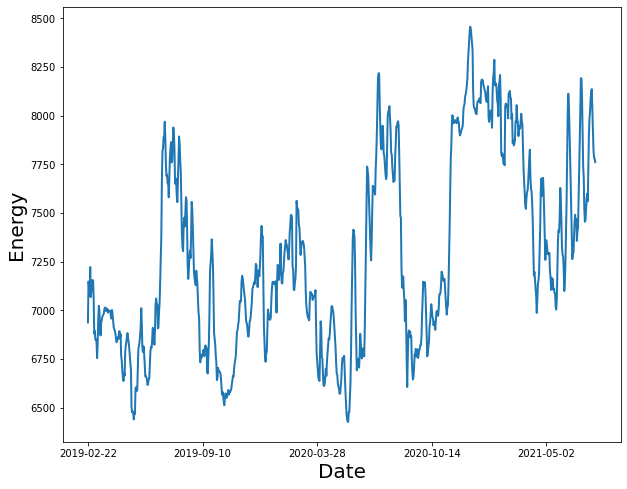

In [25]:
ax = df.energy.plot(figsize=(10,8), lw=2)
ax.set_xlabel("Date", size = 20)
ax.set_ylabel("Energy", size = 20)

/Users/oozdal/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Enthalpy')

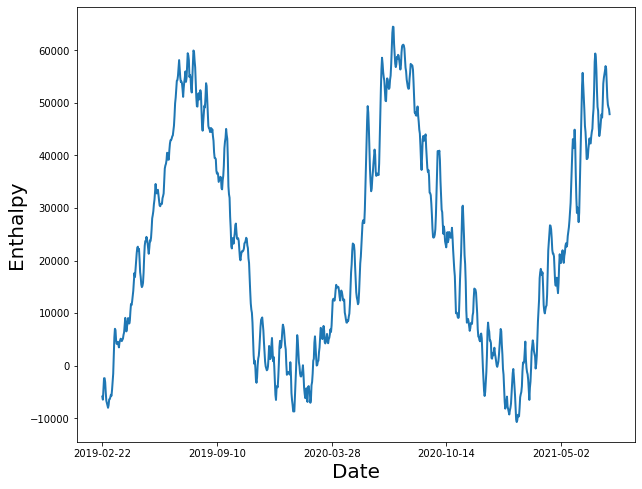

In [26]:
ax = df.enthalpy.plot(figsize=(10,8), lw=2)
ax.set_xlabel("Date", size = 20)
ax.set_ylabel("Enthalpy", size = 20)

# Train Data

/Users/oozdal/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Energy')

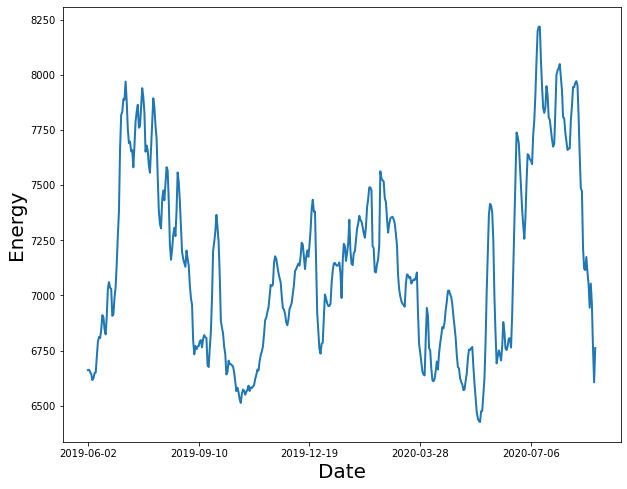

In [27]:
ax = train.energy.plot(figsize=(10,8), lw=2)
ax.set_xlabel("Date", size = 20)
ax.set_ylabel("Energy", size = 20)

/Users/oozdal/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Enthalpy')

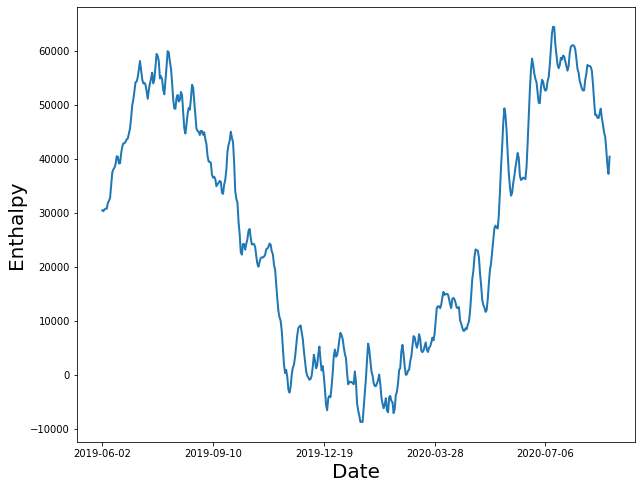

In [28]:
ax = train.enthalpy.plot(figsize=(10,8), lw=2)
ax.set_xlabel("Date", size = 20)
ax.set_ylabel("Enthalpy", size = 20)

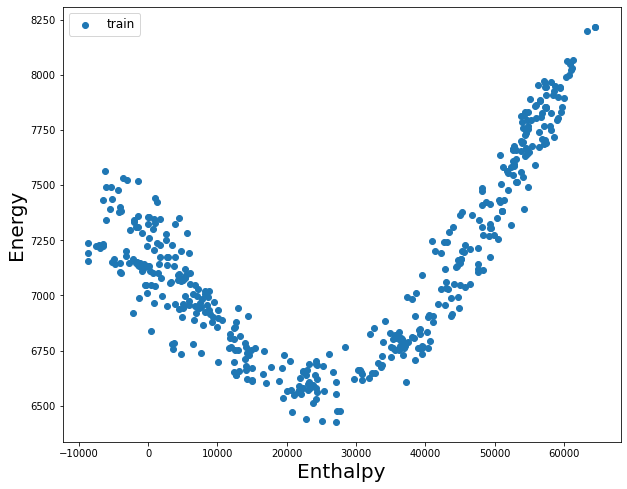

In [29]:
fig, ax1 = plt.subplots(figsize=(10,8))
fig.set_facecolor('white')
ax1.scatter(train.enthalpy, train.energy, c="tab:blue", zorder=50,label="train", linestyle='solid')
plt.xlabel("Enthalpy", fontsize=20)
plt.ylabel("Energy", fontsize=20)
plt.legend(loc='best',frameon=True, prop={'size': 12})

# Test data

/Users/oozdal/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Energy')

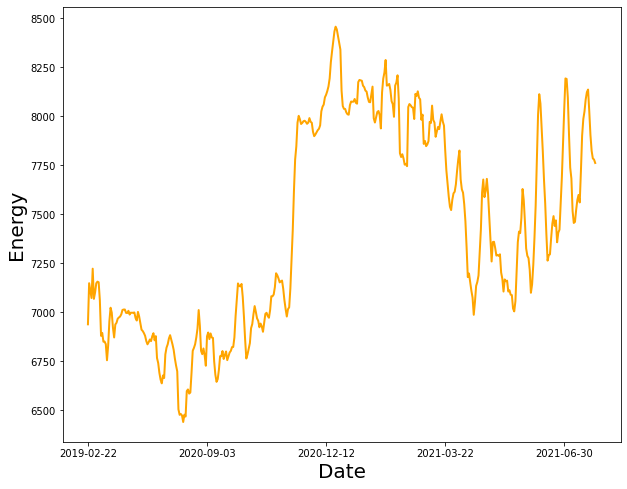

In [30]:
ax = test.energy.plot(figsize=(10,8), lw=2, color = "orange")
ax.set_xlabel("Date", size = 20)
ax.set_ylabel("Energy", size = 20)

/Users/oozdal/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Enthalpy')

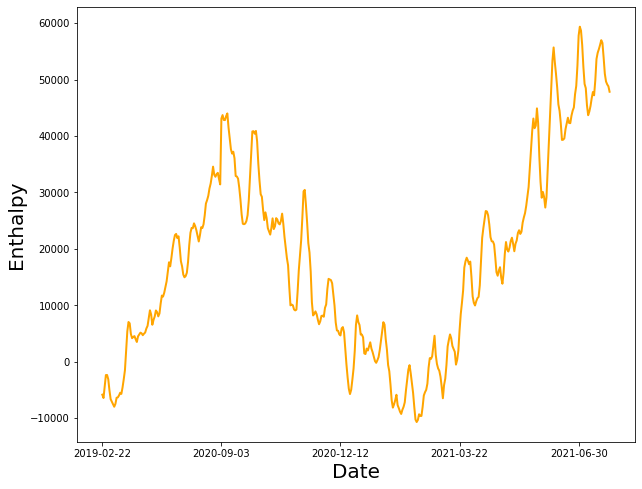

In [31]:
ax = test.enthalpy.plot(figsize=(10,8), lw=2, color = "orange")
ax.set_xlabel("Date", size = 20)
ax.set_ylabel("Enthalpy", size = 20)

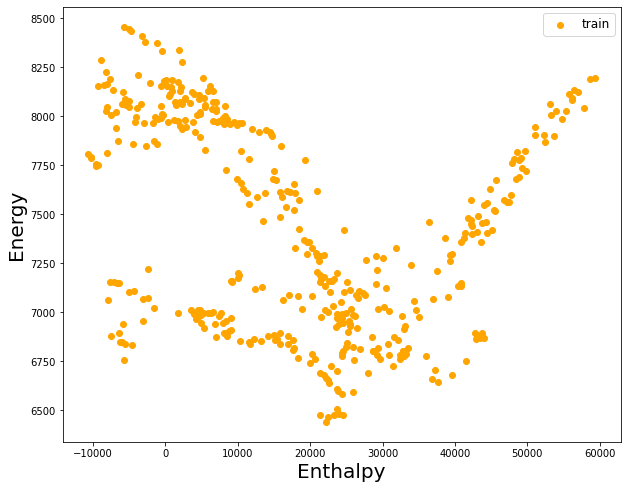

In [32]:
fig, ax1 = plt.subplots(figsize=(10,8))
fig.set_facecolor('white')
ax1.scatter(test.enthalpy, test.energy, c="orange", zorder=50,label="train", linestyle='solid')
plt.xlabel("Enthalpy", fontsize=20)
plt.ylabel("Energy", fontsize=20)
plt.legend(loc='best',frameon=True, prop={'size': 12})

# Train and Test Data in same plot

In [33]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

Text(0, 0.5, 'Energy')

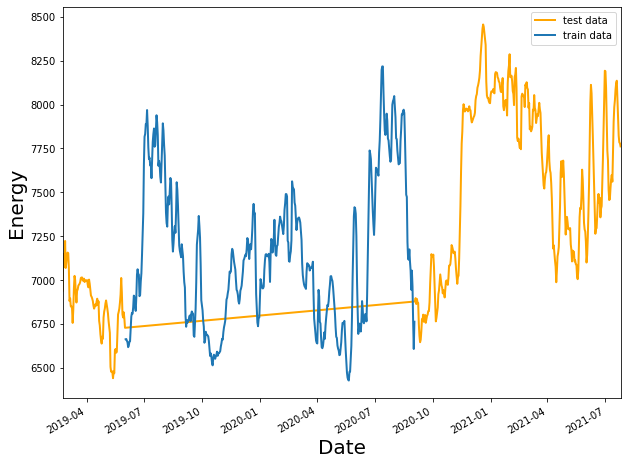

In [34]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

ax = test.plot(x='date', y='energy', label='test data', figsize=(10,8), lw=2, kind='line', color = "orange")
train.plot(x='date', y='energy', label='train data', figsize=(10,8), lw=2, ax=ax)

ax.set_xlim( [ min(test["date"]), max(test["date"]) ] ) 

ax.set_xlabel("Date", size = 20)
ax.set_ylabel("Energy", size = 20)

# Enthalpy vs energy plot

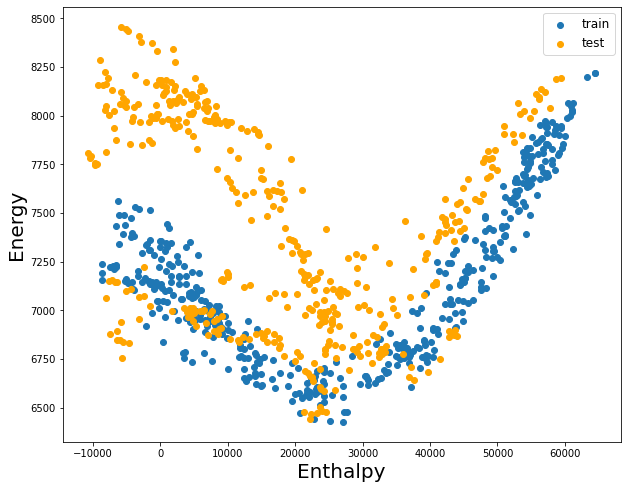

In [35]:
fig, ax1 = plt.subplots(figsize=(10,8))
fig.set_facecolor('white')
ax1.scatter(train.enthalpy, train.energy, c="tab:blue", zorder=50,label="train", linestyle='solid')
ax1.scatter(test.enthalpy, test.energy, c="orange", zorder=50,label="test", linestyle='solid')
plt.xlabel("Enthalpy", fontsize=20)
plt.ylabel("Energy", fontsize=20)
plt.legend(loc='best',frameon=True, prop={'size': 12})

In [36]:
# define the true objective function
def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

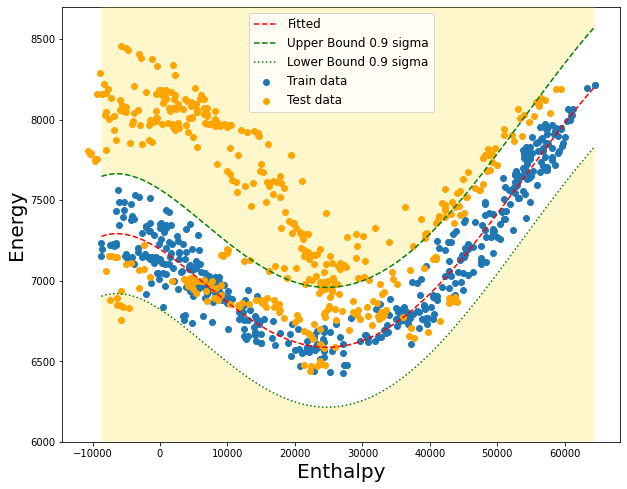

In [37]:
from scipy.optimize import curve_fit
from numpy import arange

# curve fit
popt, _ = curve_fit(objective, train.enthalpy, train.energy)
# summarize the parameter values
a, b, c, d, e, f = popt

fig, ax1 = plt.subplots(figsize=(10,8))
fig.set_facecolor('white')
ax1.scatter(train.enthalpy, train.energy, c="tab:blue", zorder=10,label="Train data", linestyle='solid')
ax1.scatter(test.enthalpy, test.energy, c="orange", zorder=20,label="Test data", linestyle='solid')

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(train.enthalpy), max(train.enthalpy), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red', zorder=30, label = "Fitted")

# Boundaries using the standard deviation
plt.plot(x_line, y_line + 0.9 * train.energy.std(), '--', color='green', zorder=30, label = "Upper Bound 0.9 sigma") # Upper bound 0.9 sigma
plt.plot(x_line, y_line - 0.9 * train.energy.std(), linestyle = "dotted", color='green', zorder=30, label = "Lower Bound 0.9 sigma") # Lower bound 0.9 sigma

ax1.fill_between(x_line, y_line + 0.9 * train.energy.std(), 9000,
                facecolor = 'gold', interpolate=True, alpha=.2, linewidth=0.0, zorder=5)

ax1.fill_between(x_line, y_line - 0.9 * train.energy.std(), 6000,
                facecolor = 'gold', interpolate=True, alpha=.2, linewidth=0.0, zorder=5)

ax1.set_ylim( [6000, 8700] ) 
plt.xlabel("Enthalpy", fontsize=20)
plt.ylabel("Energy", fontsize=20)
plt.legend(loc='best',frameon=True, prop={'size': 12})

# Finding the days where the store is not working optimally (First Approach: Without Machine Learning)

In [55]:
def Closest(list, Number):
    aux = []
    for valor in list:
        aux.append(abs(Number-valor))
    return aux.index(min(aux)) 

In [65]:
nearest_yline = []
list_optimum = []

for index in test.index:
    nearest_yline.append(y_line[Closest(x_line, test["enthalpy"][index])])
    
    if test["energy"][index] < nearest_yline[index] + 0.9 * train.energy.std() and test["energy"][index] > nearest_yline[index] - 0.9 * train.energy.std(): 
        list_optimum.append(1)
    else:
        list_optimum.append(-1)
        
test["optimal"] = list_optimum        

In [67]:
optimal_df = test[test["optimal"] == 1]
non_optimal_df = test[test["optimal"] == -1]

In [71]:
optimal_df.head()

,date,energy,enthalpy,optimal
0,2019-02-22,6938.614286,-5851.336089,1
1,2019-02-23,7148.391429,-6441.032345,1
2,2019-02-24,7110.120000,-4349.099258,1
3,2019-02-25,7072.765714,-2372.592647,1
4,2019-02-26,7222.465714,-2360.898917,1


In [72]:
non_optimal_df.head()

,date,energy,enthalpy,optimal
11,2019-03-05,6879.857143,-7477.668587,-1
12,2019-03-06,6894.814286,-6394.370594,-1
13,2019-03-07,6849.994286,-6336.514258,-1
14,2019-03-08,6850.337143,-5993.446766,-1
15,2019-03-09,6837.265714,-5509.860467,-1


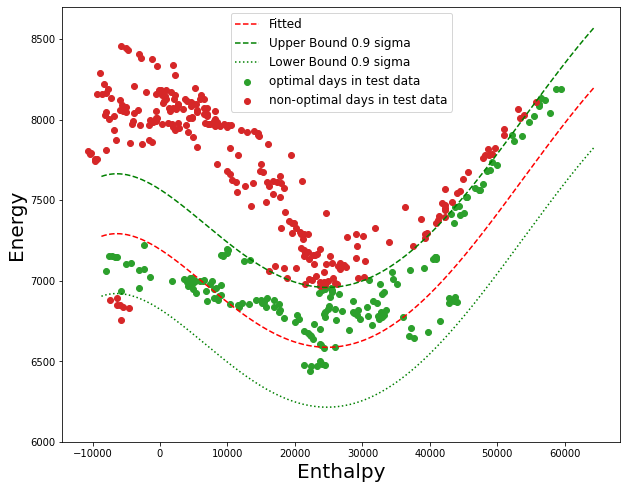

In [70]:
fig, ax1 = plt.subplots(figsize=(10,8))
fig.set_facecolor('white')

ax1.scatter(optimal_df.enthalpy, optimal_df.energy, c="tab:green", zorder=9,label="optimal days in test data", linestyle='solid')
ax1.scatter(non_optimal_df.enthalpy, non_optimal_df.energy, c="tab:red", zorder=10,label="non-optimal days in test data", linestyle='solid')

#ax1.scatter(train.enthalpy, train.energy, c="tab:blue", zorder=10,label="Train data", linestyle='solid')
#ax1.scatter(test.enthalpy, test.energy, c="orange", zorder=20,label="Test data", linestyle='solid')

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(train.enthalpy), max(train.enthalpy), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red', zorder=30, label = "Fitted")

# Boundaries using the standard deviation
plt.plot(x_line, y_line + 0.9 * train.energy.std(), '--', color='green', zorder=30, label = "Upper Bound 0.9 sigma") # Upper bound 0.9 sigma
plt.plot(x_line, y_line - 0.9 * train.energy.std(), linestyle = "dotted", color='green', zorder=30, label = "Lower Bound 0.9 sigma") # Lower bound 0.9 sigma

#ax1.fill_between(x_line, y_line + 0.9 * train.energy.std(), 9000,
#                facecolor = 'gold', interpolate=True, alpha=.2, linewidth=0.0, zorder=5)

#ax1.fill_between(x_line, y_line - 0.9 * train.energy.std(), 6000,
#                facecolor = 'gold', interpolate=True, alpha=.2, linewidth=0.0, zorder=5)

ax1.set_ylim( [6000, 8700] ) 
plt.xlabel("Enthalpy", fontsize=20)
plt.ylabel("Energy", fontsize=20)
plt.legend(loc='best',frameon=True, prop={'size': 12})

# Date vs Energy Plot

In [30]:
df["Optimum"] = np.where( (min(train["energy"]) < df["energy"]) & (df["energy"] < max(train["energy"])), 1, -1)

train["Optimum"] = 1
test["Optimum"] = np.where( (min(train["energy"]) < test["energy"]) & (test["energy"] < max(train["energy"])), 1, -1)

Text(0, 0.5, 'Energy')

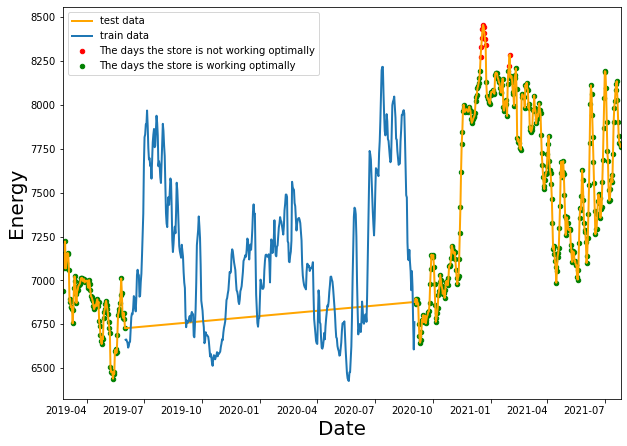

In [31]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

ax = test.plot(x='date', y='energy', label='test data', figsize=(10,8), lw=2, kind='line', color = "orange")
train.plot(x='date', y='energy', label='train data', figsize=(10,8), lw=2, ax=ax)

test_notoptimal = test[test["Optimum"] < 0]
test_notoptimal.plot(x='date', y='energy', kind="scatter", ax=ax, color="red", label="The days the store is not working optimally")

test_optimal = test[test["Optimum"] > 0]
test_optimal.plot(x='date', y='energy', kind="scatter", ax=ax, color="green", label="The days the store is working optimally").legend(loc='upper left')

ax.set_xlim( [ min(test["date"]), max(test["date"]) ] ) 
ax.set_xlabel("Date", size = 20)
ax.set_ylabel("Energy", size = 20)

# Second Approach: Using ML
# Logistic regression implementation

In [49]:
from sklearn.linear_model import LogisticRegression

if __name__ == '__main__':
    
    # features and the labels (target variables)
    X = df[["energy", "enthalpy"]]
    y = df["Optimum"]
                
    # split the data into training and test data (70% -  20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)                
    
    # training the model on the training set
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # test the model on the test set
    predictions = model.predict(X_test)
    
    print('Accuracy of the model: %.2f' % accuracy_score(y_test, predictions))
    print('Confusion Matrix: \n', confusion_matrix(predictions, y_test))

Accuracy of the model: 0.98
Confusion Matrix: 
 [[  0   0]
 [  3 175]]


In [386]:
predictions[predictions < 0]

array([], dtype=int64)

# Support Vector Machines

In [64]:
from sklearn.svm import SVC

if __name__ == '__main__':
    
    # features and the labels (target variables)
    X = df[["energy", "enthalpy"]]
    y = df["Optimum"]
    
    # split the data into training and test set (80%-20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    
    # model - we can find the right coefficients
    parameters = {'gamma': [10, 1, 0.1, 0.01, 0.001], 'C': [1, 10, 100, 1000, 10000]}
    grid = list(ParameterGrid(parameters))
    
    best_accuracy = 0
    best_parameters = None
    
    for p in grid:
        model = SVC(C=p['C'], gamma=p['gamma'])
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
                
        #print('Accuracy of the model: %.4f' % accuracy)
        y_score = model.fit(X_train, y_train).decision_function(X_test)
        
        if accuracy > best_accuracy:
            best_accuracy  = accuracy
            best_parameter = p
           
    print('We have found the best parameters...')
    print(best_accuracy)
    print(best_parameter)
    
    temp_df = pd.DataFrame({'y_test':y_test, 'predictions':predictions})
    non_optimal_df = temp_df[temp_df["predictions"] == -1]

    print("Days where the store is not working optimally")
    for index in non_optimal_df.index:
        print(index)

We have found the best parameters...
0.981203007518797
{'C': 1, 'gamma': 10}
Days where the store is not working optimally


# Naive Bayes Model

In [462]:
from sklearn.naive_bayes import GaussianNB #Import Gaussian Naive Bayes model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

if __name__ == '__main__':
    
    # features and the labels (target variables)
    X = df[["energy", "enthalpy"]]
    y = df["Optimum"]
    
    # split the data into training and test set (80%-20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)    

    #Create a Gaussian Classifier
    gnb = GaussianNB()

    #Train the model using the training sets
    gnb.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = gnb.predict(X_test)
    
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    
    temp_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
    non_optimal_df = temp_df[temp_df["y_pred"] == -1]

    print("Days where the store is not working optimally")
    for index in non_optimal_df.index:
        print(index)

Accuracy: 0.9924812030075187
Days where the store is not working optimally
2021-01-31
2020-12-19


# Question 4 (Produce the merge_ranges function)

Produce, in the language of your choice (Python strongly suggested), the `merge_ranges` function.

> This challenge is to produce the code to merge multiple ranges of values if the ranges intersect.

> The function should take a list of `DateRange`, and produces another list of `DateRange` which is the minimum representation of the input.

> A `DateRange` object is simply an object with a `start`, an `end`, with `start <= end`, where `start` and `end` are `date` objects. You can implement this object however you feel is most appropriate for the task.

Example:
Assume `date1 < date2 < date3 < date4 < date5 < date6`, then

+ `merge_ranges([DateRange(date1, date3), DateRange(date2, date4)]) == [DateRange(date1, date4)]`

+ `merge_ranges([DateRange(date1, date3), DateRange(date2, date5), DateRange(date4, date6)]) == [DateRange(date1, date6)]`

+ `merge_ranges([DateRange(date1, date2), DateRange(date3, date5), DateRange(date4, date6)]) == [DateRange(date1, date2), DateRange(date3, date6)]`

In [140]:
def merge_ranges(DateRange1, DateRange2, DateRange3 = None):

    All_DateRanges = [DateRange1, DateRange2, DateRange3]
    Temp_Range = []

    for DateRange in All_DateRanges:
        if DateRange is not None:
            #print(DateRange)
            Temp_Range.append(DateRange)
            #print(Temp_Range)
    
    if len(Temp_Range) == 2: joined_temp_range = [*Temp_Range[0], *Temp_Range[1]]
    if len(Temp_Range) == 3: joined_temp_range = [*Temp_Range[0], *Temp_Range[1], *Temp_Range[2]]
    #print(joined_temp_range)
    
    start_date = min(joined_temp_range)
    final_date = max(joined_temp_range)
    
    Final_Range = [start_date, final_date]
    return Final_Range

Assume `date1 < date2 < date3 < date4 < date5 < date6`, then

In [125]:
date1 = train["date"][0]
date2 = train["date"][5]
date3 = train["date"][10]
date4 = train["date"][15]
date5 = train["date"][20]
date6 = train["date"][25]

print("date1:", date1)
print("date2:", date2)
print("date3:", date3)
print("date4:", date4)
print("date5:", date5)
print("date6:", date6)

date1: 2019-06-02 00:00:00
date2: 2019-06-07 00:00:00
date3: 2019-06-12 00:00:00
date4: 2019-06-17 00:00:00
date5: 2019-06-22 00:00:00
date6: 2019-06-27 00:00:00


Let's check if 
+ `merge_ranges([DateRange(date1, date3), DateRange(date2, date4)]) == [DateRange(date1, date4)]`

In [135]:
DateRange13 = [date1, date3]
DateRange24 = [date2, date4]
DateRange14 = [date1, date4]

merge_ranges(list1, list2)

[Timestamp('2019-06-02 00:00:00'), Timestamp('2019-06-17 00:00:00')]

In [136]:
merge_ranges(list1, list2) == DateRange14

True

Let's check if
+ `merge_ranges([DateRange(date1, date3), DateRange(date2, date5), DateRange(date4, date6)]) == [DateRange(date1, date6)]`

In [131]:
DateRange13 = [date1, date3]
DateRange25 = [date2, date5]
DateRange36 = [date4, date6]
DateRange16 = [date1, date6]

merge_ranges(DateRange13, DateRange25, DateRange36)

[Timestamp('2019-06-02 00:00:00'), Timestamp('2019-06-27 00:00:00')]

In [132]:
merge_ranges(DateRange13, DateRange25, DateRange36) == DateRange16

True

Let's check if
+ `merge_ranges([DateRange(date1, date2), DateRange(date3, date5), DateRange(date4, date6)]) == [DateRange(date1, date2), DateRange(date3, date6)]`

In [128]:
DateRange12 = [date1, date2]
DateRange35 = [date3, date5]
DateRange46 = [date4, date6]
DateRange36 = [date3, date6]

merge_ranges(DateRange12, DateRange35, DateRange46)

[Timestamp('2019-06-02 00:00:00'), Timestamp('2019-06-27 00:00:00')]

In [129]:
merge_ranges(DateRange12, DateRange35, DateRange46) == merge_ranges(DateRange12, DateRange36)

True